In [151]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import griddata
from IPython.display import Image
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=22)
plt.gcf().tight_layout()

<Figure size 432x288 with 0 Axes>

# Problem 1

The higher order methods don't capture the discontinuities accurately. Hence, it is enought to use lower order schemes.

# Problem 2

The flux limiting is done to improve the solution by getting rid of maxima and minima near discontinutites. Drawback: Flux limiting using limiters like minmod is mere approximation. Hence, it doesn't capture physics appropriately.

# Problem 3

In [152]:
def set_periodic_bc(mm):
    mm[0,:]=mm[-1,:]
    mm[:,0]=mm[:,-1]
    return mm

In [153]:
def init_top(n):
    init=np.zeros([n,n])
    init[int(n/4):int(n*3/4),int(n/4):int(n*3/4)]=1.
    return init

In [154]:
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

## The velocities are equal
Since the velocities are positive, we don't solve the Reimann problem and only take the data from the left side only for simplification.

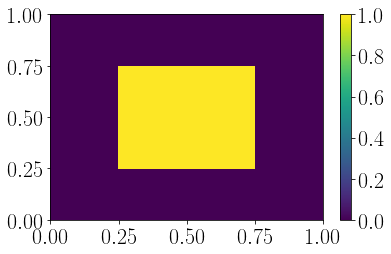

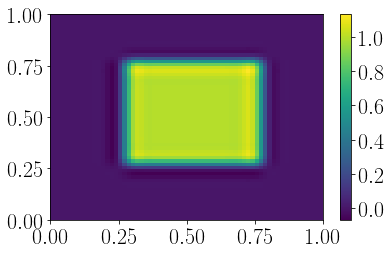

In [155]:
u=1
v=1
n=64
down=0
up=1
dd=(up-down)/(n)
x=np.append(np.arange(down,up,dd),up)
y=np.append(np.arange(down,up,dd),up)

a=init_top(n)
t=0
tmax=1
nt=0
C=0.9
dt=np.min(np.array([dd*C/u,dd*C/v]))

plt.pcolormesh(x,y,a)
plt.colorbar()
plt.tight_layout()
plt.show()

while t < tmax:
    if(np.mod(nt,2)==0):
        da=(np.roll(a,-1,axis=0)-np.roll(a,1,axis=0))/(2.*dd)
        dadd=(a[:-1,:]+dd/2.*(1.-dt/dd*v)*da[:-1,:])*v
        a[1:,:]=a[1:,:]-dt/dd*(np.roll(dadd,-1,axis=0)-dadd)
        
        da=(np.roll(a,-1,axis=1)-np.roll(a,1,axis=1))/(2.*dd)
        dadd=(a[:,:-1]+dd/2.*(1.-dt/dd*u)*da[:,:-1])*u
        a[:,1:]=a[:,1:]-dt/dd*(np.roll(dadd,-1,axis=1)-dadd)
        a=set_periodic_bc(a)
    else:  
        da=(np.roll(a,-1,axis=1)-np.roll(a,1,axis=1))/(2.*dd)
        dadd=(a[:,:-1]+dy/2.*(1.-dt/dd*u)*da[:,:-1])*u
        a[:,1:]=a[:,1:]-dt/dd*(np.roll(dadd,-1,axis=1)-dadd)
        
        da=(np.roll(a,-1,axis=0)-np.roll(a,1,axis=0))/(2.*dd)
        dadd=(a[:-1,:]+dd/2.*(1.-dt/dd*v)*da[:-1,:])*v
        a[1:,:]=a[1:,:]-dt/dd*(np.roll(dadd,-1,axis=0)-dadd)
        a=set_periodic_bc(a)
        
    t= t+dt
    nt= nt+1
    
plt.pcolormesh(x,y,a)
plt.colorbar()
plt.tight_layout()
plt.show()

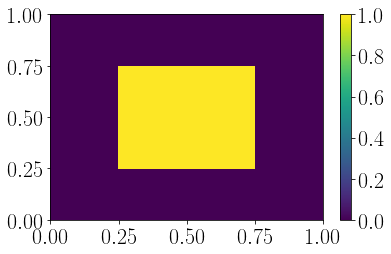

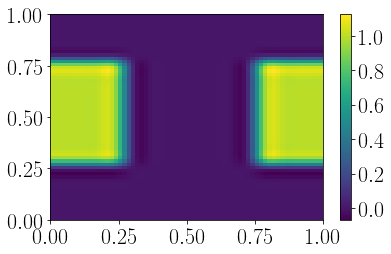

In [156]:
u=0.5
v=1
n=64
down=0
up=1
dd=(up-down)/(n)
x=np.append(np.arange(down,up,dd),up)
y=np.append(np.arange(down,up,dd),up)

a=init_top(n)
t=0
tmax=1
nt=0
C=0.9
dt=np.min(np.array([dd*C/u,dd*C/v]))

plt.pcolormesh(x,y,a)
plt.colorbar()
plt.tight_layout()
plt.show()

while t < tmax:
    if(np.mod(nt,2)==0):
        da=(np.roll(a,-1,axis=0)-np.roll(a,1,axis=0))/(2.*dd)
        dadd=(a[:-1,:]+dd/2.*(1.-dt/dd*v)*da[:-1,:])*v
        a[1:,:]=a[1:,:]-dt/dd*(np.roll(dadd,-1,axis=0)-dadd)
        
        da=(np.roll(a,-1,axis=1)-np.roll(a,1,axis=1))/(2.*dd)
        dadd=(a[:,:-1]+dd/2.*(1.-dt/dd*u)*da[:,:-1])*u
        a[:,1:]=a[:,1:]-dt/dd*(np.roll(dadd,-1,axis=1)-dadd)
        a=set_periodic_bc(a)
    else:  
        da=(np.roll(a,-1,axis=1)-np.roll(a,1,axis=1))/(2.*dd)
        dadd=(a[:,:-1]+dy/2.*(1.-dt/dd*u)*da[:,:-1])*u
        a[:,1:]=a[:,1:]-dt/dd*(np.roll(dadd,-1,axis=1)-dadd)
        
        da=(np.roll(a,-1,axis=0)-np.roll(a,1,axis=0))/(2.*dd)
        dadd=(a[:-1,:]+dd/2.*(1.-dt/dd*v)*da[:-1,:])*v
        a[1:,:]=a[1:,:]-dt/dd*(np.roll(dadd,-1,axis=0)-dadd)
        a=set_periodic_bc(a)
        
    t= t+dt
    nt= nt+1
    
plt.pcolormesh(x,y,a)
plt.colorbar()
plt.tight_layout()
plt.show()

From the above figure, we can see that when the x velocity is halved, the top hat moved by half in the x direction.

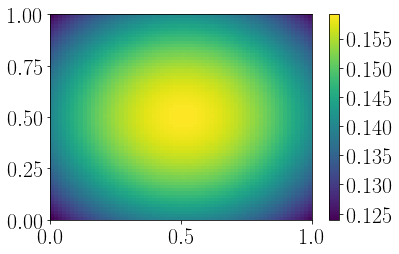

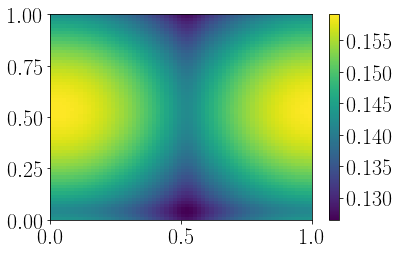

In [157]:
u=0.5
v=1
n=64
down=0
up=1
dd=(up-down)/(n)
x=np.append(np.arange(down,up,dd),up)
y=np.append(np.arange(down,up,dd),up)

xm, ym = np.meshgrid(x[:-1], y[:-1])
a = gaus2d(xm, ym,0.5,0.5)
t=0
tmax=1
nt=0
C=0.9
dt=np.min(np.array([dd*C/u,dd*C/v]))

plt.pcolormesh(x,y,a)
plt.colorbar()
plt.tight_layout()
plt.show()

while t < tmax:
    if(np.mod(nt,2)==0):
        da=(np.roll(a,-1,axis=0)-np.roll(a,1,axis=0))/(2.*dd)
        dadd=(a[:-1,:]+dd/2.*(1.-dt/dd*v)*da[:-1,:])*v
        a[1:,:]=a[1:,:]-dt/dd*(np.roll(dadd,-1,axis=0)-dadd)
        
        da=(np.roll(a,-1,axis=1)-np.roll(a,1,axis=1))/(2.*dd)
        dadd=(a[:,:-1]+dd/2.*(1.-dt/dd*u)*da[:,:-1])*u
        a[:,1:]=a[:,1:]-dt/dd*(np.roll(dadd,-1,axis=1)-dadd)
        a=set_periodic_bc(a)
    else:  
        da=(np.roll(a,-1,axis=1)-np.roll(a,1,axis=1))/(2.*dd)
        dadd=(a[:,:-1]+dy/2.*(1.-dt/dd*u)*da[:,:-1])*u
        a[:,1:]=a[:,1:]-dt/dd*(np.roll(dadd,-1,axis=1)-dadd)
        
        da=(np.roll(a,-1,axis=0)-np.roll(a,1,axis=0))/(2.*dd)
        dadd=(a[:-1,:]+dd/2.*(1.-dt/dd*v)*da[:-1,:])*v
        a[1:,:]=a[1:,:]-dt/dd*(np.roll(dadd,-1,axis=0)-dadd)
        a=set_periodic_bc(a)
        
    t= t+dt
    nt= nt+1
    
plt.pcolormesh(x,y,a)
plt.colorbar()
plt.tight_layout()
plt.show()

# Problem 4

In [213]:
def init_step(n,x,dx):
    init=np.ones(n)
    init[int(n/2):]=2
    return init

In [244]:
def init_sin(n,x,dx):
    init=np.ones(n)
    l=int(1/3*n)
    u=int(2/3*n)
    init[l:u]=1.+0.5*np.sin(2.*np.pi*(3*x[l:u]-1))
    return init

In [245]:
def Riemann(uL,uR,u):
    n=len(uL)
    us=np.zeros(n)
    for i in range(n):
        sr=u[i+1]*u[i+1]/2.
        sl=u[i]*u[i]/2.
        if (u[i]>u[i+1]):
            s=(sr-sl)/(u[i+1]-u[i])
            if s > 0:
                us[i]=uL[i]
            elif s < 0:
                us[i]=uR[i]
        else:
            if u[i]>0:
                us[i]=uL[i]
            elif u[i+1]<0:
                us[i]=uR[i]
                
    dudx=1/2*us*us
            
    return dudx

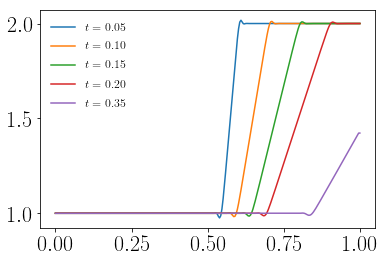

In [264]:
n=256

down=0
up=1
dd=(up-down)/(n)
x=np.append(np.arange(down,up,dd),up)

dx=(up-down)/n
u=init_step(n+1,x,dx)

C=0.8
t=0
tup=0.4

while t < tup:
    #The time step changes with veloity every step
    dt=np.min(dx*C/np.abs(u))
    
    #Making the du/dx zero in the ends
    du=(np.roll(u,-1)-np.roll(u,1))/(2.*dx)
    du[0]=0
    du[-1]=0
    
    #Find the left and right states
    ul=u[:-1]+dx/2.*(1.-u[:-1]*dt/dx)*du[:-1]
    ur=u[1:]-dx/2.*(1.+u[1:]*dt/dx)*du[1:]
    
    #Solve Riemann
    dudx=Riemann(ul,ur,u)
    u[1:-1]=u[1:-1]-dt/dx*(np.roll(dudx,-1)-dudx)[:-1]
    
    #Setting Neumann BC in the right to retain the step
    u[-1]=u[-2]
    
    #increment time
    t += dt
    
    #Plot every 0.05 time units
    if(np.remainder(t,0.05) < 0.001):
        plt.plot(x, u, label="$ t = %1.2f $" %t)
            

plt.legend(frameon=False,fontsize=12)
plt.show()

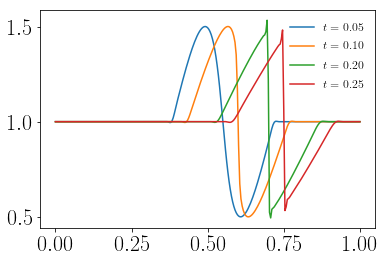

In [263]:
n=256

down=0
up=1
dd=(up-down)/(n)
x=np.append(np.arange(down,up,dd),up)

dx=(up-down)/n
u=init_sin(n+1,x,dx)

C=0.8
t=0
tup=0.4

while t < tup:
    
    #The time step changes with veloity every step
    dt=np.min(dx*C/np.abs(u))
    
    #Making the du/dx zero in the ends
    du=(np.roll(u,-1)-np.roll(u,1))/(2.*dx)
    du[0]=0
    du[-1]=0
    
    #Find the left and right states
    ul=u[:-1]+dx/2.*(1.-u[:-1]*dt/dx)*du[:-1]
    ur=u[1:]-dx/2.*(1.+u[1:]*dt/dx)*du[1:]
    
    #Solve Riemann
    dudx=Riemann(ul,ur,u)
    u[1:-1]=u[1:-1]-dt/dx*(np.roll(dudx,-1)-dudx)[:-1]
    
    #Setting Neumann BC in the right to retain the step
    u[-1]=u[-2]
    
    #increment time
    t += dt
    
    #Plot every 0.05 time units
    if(np.remainder(t,0.05) < 0.001):
        plt.plot(x, u, label="$ t = %1.2f $" %t)
            

plt.legend(frameon=False,fontsize=12)
plt.show()

# Problem 5

In [253]:
def init_step2(n,dx):
    init=np.ones(n)
    init[:int(n/2)]=2.
    return init

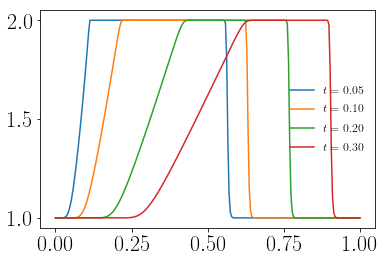

In [266]:
n=256
down=0
up=1
dd=(up-down)/(n)
x=np.append(np.arange(down,up,dd),up)
dx=(up-down)/n

C=.9
t=0
tup=0.3
u=initialize_state(n+1,dx)

while t < tup:
    dt=np.min(dx*C/np.abs(u))
    u[1:]=u[1:]-dt/dx*u[1:]*(u[1:]-u[:-1])
    
    #Periodic boundary condition
    u[0]=u[-1]
    
    t += dt
    if(np.remainder(t,0.05) < 0.001):
        plt.plot(x, u, label="$ t = %1.2f $" %t)
            

plt.legend(frameon=False,fontsize=12)
plt.show()